In [1]:
import sys, h5py
from os import path 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True

# Path to sledgehamr top directory
sys.path.append('../../sledgehamr')
import pySledgehamr as sledgehamr

exec_dir = "../examples/NextToMinimalExample/"

# Step 1: Create Initial State
We reuse the initial state of MinimalExample. See MinimalExample.ipynb for details.

# Step 2: Run the simulation. 
Follow instructions in 'examples/NextToMinimalExample/README'. For reference, the simulation takes just over 5 minutes on a single dual-socket AMD EPYC 7763 node and requires about 842 MB of disk space. Your milage may vary.

# Step 3: Plot Output

In [2]:
output = sledgehamr.Output(exec_dir + 'output')

Number of slices found: 12
Number of coarse boxes found: 3
Number of full boxes found: 0
Number of projections found: 3
Number of spectra found: 3
Number of gravitational wave spectra found: 0
Number of slices of truncation errors found: 0
Number of coarse boxes of truncation errors found: 0
Number of full boxes of truncation errors found: 0


### Plot the projection of $\dot{a}^2$.

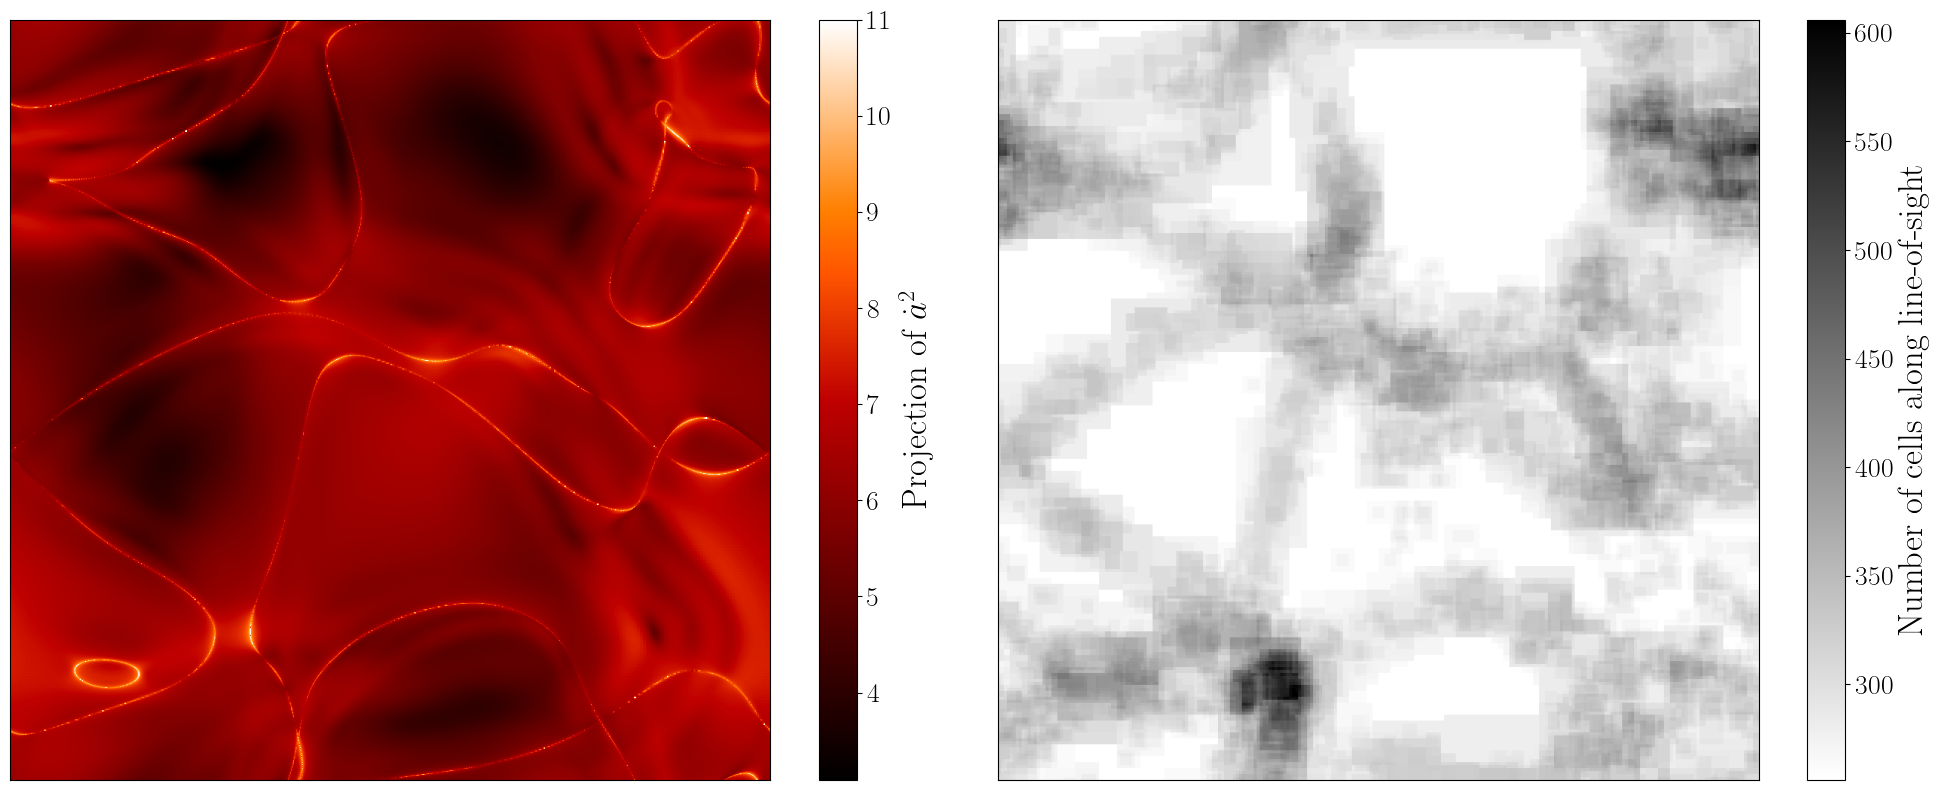

In [3]:
# Id of projection to be plotted.
i = 2

# Read projection.
projection   = output.GetProjection(i, ['a_dot_sq'])
projection_n = output.GetProjectionN(i, ['a_dot_sq'])
t = projection['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,8), ncols=2)

im = ax[0].imshow(np.log(projection['a_dot_sq']), cmap='gist_heat', vmax=11)
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=20)
cb.set_label(label=r'Projection of $\dot{a}^2$',fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(projection_n['a_dot_sq'], cmap='binary')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=20)
cb.set_label(label=r'Number of cells along line-of-sight',fontsize=25)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

### Plot the spectrum $S_{\dot{a}^2}(|k|)$.

Text(0, 0.5, '$S_{\\dot{a}^2}(|k|)$')

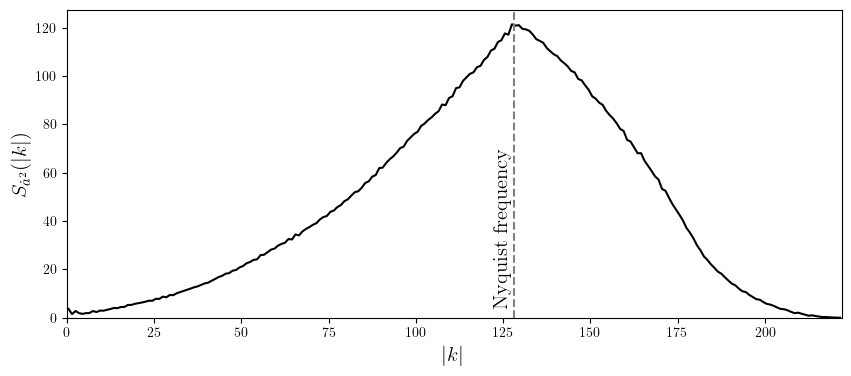

In [4]:
# Id of spectrum to be plotted.
i = 2
unbinned_spectrum = output.GetSpectrum(i, ['a_dot_sq'])

# Bin the data
k_unbinned = np.sqrt(unbinned_spectrum['k_sq'])
k_max = int(k_unbinned[-1])+1
k_edges = np.linspace(0, k_max, k_max+1)
k = (k_edges[1:]+k_edges[:-1])/2
spectrum, null = np.histogram(k_unbinned, bins=k_edges, weights=unbinned_spectrum['a_dot_sq'][:])

# Plot.
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(k, spectrum, color='black')
plt.axvline(k_max/np.sqrt(3), color='gray', linestyle='--')
plt.xlim(0,k_max)
plt.ylim(0,)
plt.text(122,5,r'Nyquist frequency', fontsize=15, rotation=90, color='black')

plt.xlabel(r'$|k|$', fontsize=15)
plt.ylabel(r'$S_{\dot{a}^2}(|k|)$', fontsize=15)

### Read and plot our custom output of the average value of the radial mode. We can see how it becomes dynamical and starts oscillating around its vev at <r>~1.

Text(0, 0.5, '$\\langle r\\rangle$')

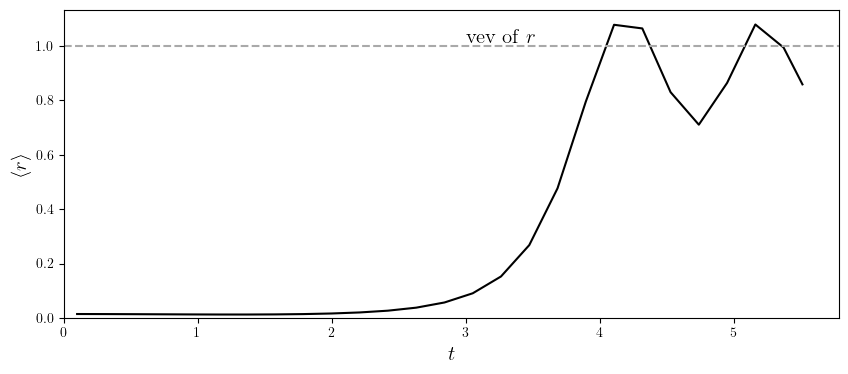

In [5]:
# Read data.
t = []
avg = []

i=0
while True:
    file = exec_dir + 'output/avg/' + str(i) + '/vev.h5'
    if not path.exists(file):
        break
        
    fin = h5py.File(file,'r')
    t.append( fin['data'][0] )
    avg.append( fin['data'][1] )
    fin.close()
    
    i = i + 1
    
# Plot.
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(t, avg, color='black')
plt.axhline(1, linestyle='--', color='darkgray')
plt.text(3, 1.01, r'vev of $r$', fontsize=15, color='black')
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$\langle r\rangle$', fontsize=15)  